In [1]:
import pandas as pd
import seaborn as sns
import datetime
import warnings
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf



In [2]:
df = pd.read_csv('crude_rate.csv')


In [3]:
df = df.replace('Suppressed', 0)

In [4]:
# convert the obj to numeric
df['Deaths'] = pd.to_numeric(df['Deaths'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
State                                                              816 non-null object
Year                                                               816 non-null int64
Deaths                                                             816 non-null int64
Population                                                         816 non-null int64
Crude Rate                                                         816 non-null object
Crude Rate Lower 95% Confidence Interval                           816 non-null object
Crude Rate Upper 95% Confidence Interval                           816 non-null object
Prescriptions Dispensed by US Retailers in that year (millions)    816 non-null int64
dtypes: int64(4), object(4)
memory usage: 51.1+ KB


In [6]:
# Functions
# def subseting (df ,state):
#     df_copy = df.copy()
#     df_copy= df[df.State == state]
#     df_copy = pd.to_numeric(df['Deaths'])
#     df_copy = df[[ 'Year' , 'Deaths']]
#     return df_copy

def convert_to_dt(row):
    dt = datetime.datetime(row.Year, 1, 1)
    return dt

def convert_to_dt1(df):
    df_copy = df.copy()
    df_copy.Year = df_copy.apply(convert_to_dt , axis =1)
    return df_copy

In [7]:
def subseting (df ,state):
    df_copy = df.copy()
    df = df[df.State == state]
    df_copy = df[[ 'Year' , 'Deaths']]
    df = pd.to_numeric(df['Deaths'])
    return df_copy

In [8]:
list_of_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

## Subseting df by State

In [9]:
df_Alabama = subseting(df , list_of_states[0])

In [10]:
df_Alabama

,Year,Deaths
0,1999,39
1,2000,46
2,2001,67
3,2002,75
4,2003,54
5,2004,92
6,2005,83
7,2006,134
8,2007,172
9,2008,195


In [11]:
df_Alaska = subseting(df, list_of_states[1])

In [12]:
df_Arizona = subseting(df , list_of_states[2])

In [13]:
df_Arkansas = subseting(df , list_of_states[3])

In [14]:
df_California = subseting (df , list_of_states[4])

In [15]:
df_Colorado = subseting(df , list_of_states[5])

In [16]:
df_Connecticut = subseting (df , list_of_states[6])

In [17]:
df_Delaware = subseting(df , list_of_states[7])

In [18]:
df_DSC = subseting(df , list_of_states[8])

In [19]:
df_DSC

,Year,Deaths
128,1999,28
129,2000,43
130,2001,48
131,2002,29
132,2003,60
133,2004,53
134,2005,45
135,2006,62
136,2007,29
137,2008,33


In [20]:
df_Florida = subseting(df ,list_of_states[9])

In [21]:
df_Georgia = subseting(df , list_of_states[10])

In [22]:
df_Hawaii = subseting(df , list_of_states[11])

In [23]:
df_Idaho = subseting(df , list_of_states[12])

In [24]:
df_Illinois = subseting (df , list_of_states[13])

In [25]:
df_Indiana = subseting(df , list_of_states[14])

In [26]:
df_Iowa = subseting(df , list_of_states[15])

In [27]:
df_Kansas = subseting(df , list_of_states[16])

In [28]:
df_Kentucky = subseting(df , list_of_states[17])

In [29]:
df_Louisiana = subseting(df , list_of_states[18])

In [30]:
df_Maine = subseting(df , list_of_states[19])

In [31]:
df_Maryland = subseting(df , list_of_states[20])

In [32]:
df_Massachusetts = subseting(df , list_of_states[21])

In [33]:
df_Michigan = subseting(df , list_of_states[22])

In [34]:
df_Minnesota = subseting(df , list_of_states[23])

In [35]:
df_Mississippi = subseting(df , list_of_states[24])

In [36]:
df_Missouri = subseting(df , list_of_states[25])

In [37]:
df_Montana = subseting(df , list_of_states[26])

In [38]:
df_Nebraska = subseting(df , list_of_states[27])

In [39]:
df_Nevada = subseting(df , list_of_states [28])

In [40]:
df_New_Hampshire = subseting(df , list_of_states [29])

In [41]:
df_New_Jersey = subseting(df , list_of_states [30])

In [42]:
df_New_Mexico = subseting(df , list_of_states [31])

In [43]:
df_NY = subseting(df , list_of_states [32])

In [44]:
df_North_Carolina = subseting(df , list_of_states [33])

In [45]:
df_North_Dakota = subseting(df , list_of_states [34])

In [46]:
df_Ohio = subseting(df , list_of_states [35])

In [47]:
df_Oklahoma = subseting(df , list_of_states [36])

In [48]:
df_Oregon = subseting(df , list_of_states [37])

In [49]:
df_Pennsylvania = subseting(df , list_of_states [38])

In [50]:
df_Rhode_Island = subseting(df , list_of_states [39])

In [51]:
df_South_Carolina = subseting(df , list_of_states [40])

In [52]:
df_South_Dakota = subseting(df , list_of_states [41])

In [53]:
df_Tennessee = subseting(df , list_of_states [42])

In [54]:
df_Texas = subseting(df , list_of_states [43])

In [55]:
df_Utah = subseting(df , list_of_states [44])

In [56]:
df_Vermot = subseting(df , list_of_states [45])

In [57]:
df_Virginia = subseting(df , list_of_states [46])

In [58]:
df_Washington = subseting(df , list_of_states [47])

In [59]:
df_West_Virginia = subseting(df , list_of_states [48])

In [60]:
df_Wisconsin = subseting(df , list_of_states [49])

In [61]:
df_Wyoming = subseting(df , list_of_states [50])

## Converting Year in datetime obj

In [61]:
# df_Alabama.Year = df_Alabama.apply(convert_to_dt, axis=1)
df_Alabama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 2 columns):
Year      16 non-null int64
Deaths    16 non-null int64
dtypes: int64(2)
memory usage: 384.0 bytes


In [62]:
# df_Arizona.Year = df_Arizona.apply(convert_to_dt , axis =1)

In [62]:
df_Alabama = convert_to_dt1(df_Alabama)

In [64]:
df_Alabama

,Year,Deaths
0,1999-01-01,39
1,2000-01-01,46
2,2001-01-01,67
3,2002-01-01,75
4,2003-01-01,54
5,2004-01-01,92
6,2005-01-01,83
7,2006-01-01,134
8,2007-01-01,172
9,2008-01-01,195


In [63]:
df_Arizona = convert_to_dt1(df_Arizona)

In [64]:
df_Arkansas = convert_to_dt1(df_Arkansas)

In [65]:
df_California = convert_to_dt1(df_California)

In [66]:
df_Colorado = convert_to_dt1(df_Colorado)

In [67]:
df_Connecticut= convert_to_dt1(df_Connecticut)

In [68]:
df_Delaware = convert_to_dt1(df_Delaware)

In [69]:
df_DSC = convert_to_dt1(df_DSC)

In [70]:
df_Florida = convert_to_dt1(df_Florida)

In [71]:
df_Georgia = convert_to_dt1(df_Georgia)

In [72]:
df_Hawaii = convert_to_dt1(df_Hawaii)

In [73]:
df_Idaho = convert_to_dt1(df_Idaho)

In [74]:
df_Illinois = convert_to_dt1(df_Illinois)

In [75]:
df_Indiana = convert_to_dt1(df_Indiana)

In [76]:
df_Iowa = convert_to_dt1(df_Iowa)

In [77]:
df_Kansas = convert_to_dt1(df_Kansas)

In [78]:
df_Kentucky = convert_to_dt1(df_Kentucky)

In [79]:
df_Louisiana = convert_to_dt1(df_Louisiana)


In [80]:
df_Maine = convert_to_dt1(df_Maine)


In [81]:
df_Maryland = convert_to_dt1(df_Maryland)

In [82]:
df_Massachusetts = convert_to_dt1(df_Massachusetts)

In [83]:
df_Michigan = convert_to_dt1(df_Michigan)

In [84]:
df_Minnesota = convert_to_dt1(df_Minnesota)

In [85]:
df_Mississippi = convert_to_dt1(df_Mississippi)

In [86]:
df_Missouri = convert_to_dt1(df_Missouri)

In [87]:
df_Montana = convert_to_dt1(df_Montana)

In [88]:
df_Nebraska = convert_to_dt1(df_Nebraska)

In [89]:
df_Nevada = convert_to_dt1(df_Nevada)

In [90]:
df_New_Hampshire = convert_to_dt1(df_New_Hampshire)

In [91]:
df_New_Jersey = convert_to_dt1(df_New_Jersey)

In [92]:
df_New_Mexico = convert_to_dt1(df_New_Mexico)

In [93]:
df_North_Carolina = convert_to_dt1(df_North_Carolina)

In [94]:
df_North_Dakota = convert_to_dt1(df_North_Dakota)

In [95]:
df_NY  = convert_to_dt1(df_NY)

In [96]:
df_Ohio = convert_to_dt1(df_Ohio)

In [97]:
df_Oklahoma = convert_to_dt1(df_Oklahoma)

In [98]:
df_Oregon = convert_to_dt1(df_Oregon)

In [99]:
df_Pennsylvania = convert_to_dt1(df_Pennsylvania)

In [100]:
df_Rhode_Island = convert_to_dt1(df_Rhode_Island)

In [101]:
df_South_Carolina = convert_to_dt1(df_South_Carolina)

In [102]:
df_South_Dakota = convert_to_dt1(df_South_Dakota)

In [103]:
df_Tennessee = convert_to_dt1(df_Tennessee)

In [104]:
df_Texas = convert_to_dt1(df_Texas)

In [105]:
df_Utah = convert_to_dt1(df_Utah)

In [106]:
df_Vermot = convert_to_dt1(df_Vermot)


In [107]:
df_Virginia = convert_to_dt1(df_Virginia)

In [108]:
df_Washington = convert_to_dt1(df_Washington)

In [109]:
df_West_Virginia = convert_to_dt1(df_West_Virginia)

In [110]:
df_Wisconsin = convert_to_dt1(df_Wisconsin)

In [111]:
df_Wyoming = convert_to_dt1(df_Wyoming)


In [115]:
df_Wyoming

,Year,Deaths
800,1999-01-01,0
801,2000-01-01,10
802,2001-01-01,0
803,2002-01-01,17
804,2003-01-01,0
805,2004-01-01,14
806,2005-01-01,10
807,2006-01-01,14
808,2007-01-01,25
809,2008-01-01,48


## Plot to see Stationarity

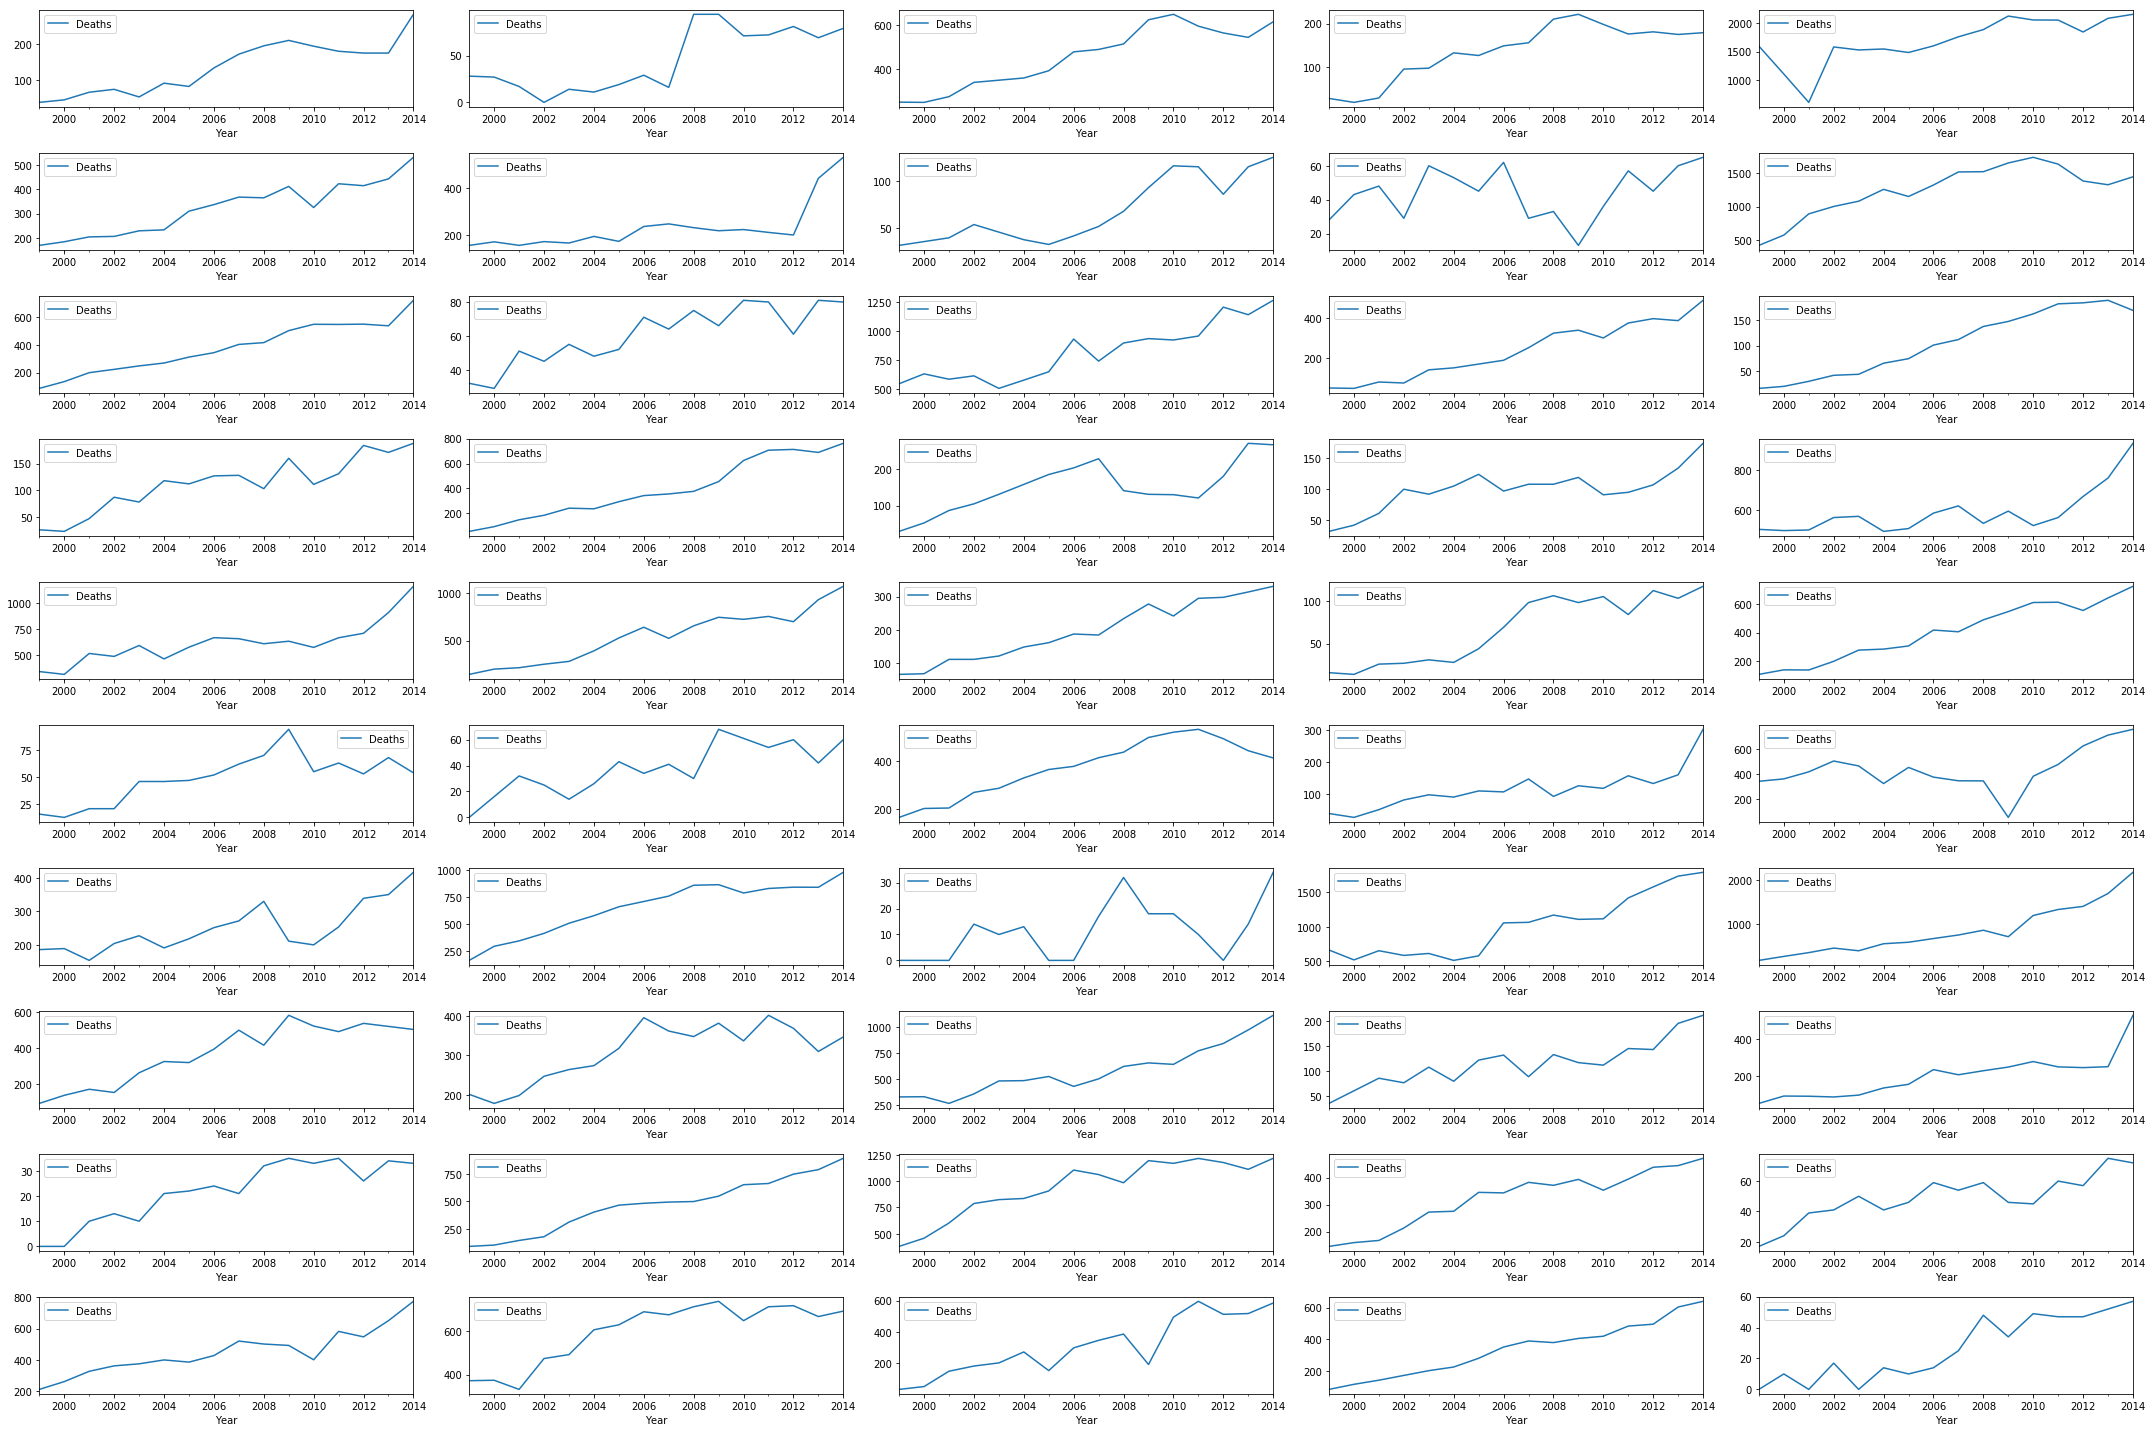

In [116]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(30,20), facecolor='white')

# plot numbering starts at 1, not 0
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

plot_number = 1
for i in list_of_df:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax)
#     ax.set_title(list_of_df)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

## Transformation, Smoothing, and Differencing 


#### Based on Dickey-Fuller test, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the time series is stationary.

In [118]:
def dickey_fuller(list_of_dfs):
    for i in list_of_dfs:
        X = i["Deaths"].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [112]:
list_of_df = [df_Alabama, df_Alaska, df_Arizona, df_Arkansas, df_California, df_Colorado, df_Connecticut,df_Delaware, df_DSC, df_Florida, df_Georgia,df_Idaho,
             df_Illinois, df_Indiana , df_Iowa, df_Kansas, df_Kentucky , df_Louisiana , df_Maine ,df_Maryland ,df_Massachusetts,
             df_Michigan, df_Minnesota, df_Mississippi ,df_Missouri,df_Montana , df_Nebraska , df_Nevada, df_New_Hampshire ,
             df_New_Jersey , df_New_Mexico , df_North_Carolina , df_North_Dakota , df_NY ,df_Ohio , df_Oklahoma , df_Oregon, df_Pennsylvania ,df_Rhode_Island, df_South_Carolina,
             df_South_Dakota , df_Tennessee , df_Texas , df_Utah ,df_Vermot , df_Virginia , df_Washington , df_West_Virginia ,
             df_Wisconsin , df_Wyoming]

In [121]:
dickey_fuller(list_of_df)

ADF Statistic: 0.249449
p-value: 0.974903
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: -0.970722
p-value: 0.763792
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.939
	5%: -3.478
	10%: -2.844
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: -1.189738
p-value: 0.677994
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772
ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803
ADF Statistic: 0.000000
p-value: 0.9

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [113]:
def log_trans(list_dfs):
    for i in list_dfs:
        i["Deaths"] = np.log(i["Deaths"])
        i['Deaths'] = i['Deaths'].diff()

In [112]:
# # trying to correct statinarity
# def diff (list_df1):
#     for i in list_df1:
#         i['Deaths'] = i['Deaths'].diff()

In [116]:
# def log_st(list_dfs):
#     for i in list_dfs:
#         i["Deaths"] = np.log(i["Deaths"])


In [121]:
# def average_l(list_of_df):
#     for i in list_of_df:
#         i['Deaths'].mean()

In [122]:
# average_l(list_of_df)

In [123]:
list_of_df

[         Year  Deaths
 0  1999-01-01      39
 1  2000-01-01      46
 2  2001-01-01      67
 3  2002-01-01      75
 4  2003-01-01      54
 5  2004-01-01      92
 6  2005-01-01      83
 7  2006-01-01     134
 8  2007-01-01     172
 9  2008-01-01     195
 10 2009-01-01     210
 11 2010-01-01     194
 12 2011-01-01     180
 13 2012-01-01     175
 14 2013-01-01     175
 15 2014-01-01     282,     Year  Deaths
 16  1999      28
 17  2000      27
 18  2001      17
 19  2002       0
 20  2003      14
 21  2004      11
 22  2005      19
 23  2006      29
 24  2007      16
 25  2008      94
 26  2009      94
 27  2010      71
 28  2011      72
 29  2012      81
 30  2013      69
 31  2014      79,          Year  Deaths
 32 1999-01-01     250
 33 2000-01-01     249
 34 2001-01-01     275
 35 2002-01-01     340
 36 2003-01-01     350
 37 2004-01-01     360
 38 2005-01-01     393
 39 2006-01-01     479
 40 2007-01-01     490
 41 2008-01-01     515
 42 2009-01-01     625
 43 2010-01-01     650
 44 

In [115]:
# plain
list_of_df

[         Year  Deaths
 0  1999-01-01      39
 1  2000-01-01      46
 2  2001-01-01      67
 3  2002-01-01      75
 4  2003-01-01      54
 5  2004-01-01      92
 6  2005-01-01      83
 7  2006-01-01     134
 8  2007-01-01     172
 9  2008-01-01     195
 10 2009-01-01     210
 11 2010-01-01     194
 12 2011-01-01     180
 13 2012-01-01     175
 14 2013-01-01     175
 15 2014-01-01     282,     Year  Deaths
 16  1999      28
 17  2000      27
 18  2001      17
 19  2002       0
 20  2003      14
 21  2004      11
 22  2005      19
 23  2006      29
 24  2007      16
 25  2008      94
 26  2009      94
 27  2010      71
 28  2011      72
 29  2012      81
 30  2013      69
 31  2014      79,          Year  Deaths
 32 1999-01-01     250
 33 2000-01-01     249
 34 2001-01-01     275
 35 2002-01-01     340
 36 2003-01-01     350
 37 2004-01-01     360
 38 2005-01-01     393
 39 2006-01-01     479
 40 2007-01-01     490
 41 2008-01-01     515
 42 2009-01-01     625
 43 2010-01-01     650
 44 

In [117]:
# log_st(list_of_df) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
# log trans
# list_of_df

[         Year    Deaths
 0  1999-01-01  3.663562
 1  2000-01-01  3.828641
 2  2001-01-01  4.204693
 3  2002-01-01  4.317488
 4  2003-01-01  3.988984
 5  2004-01-01  4.521789
 6  2005-01-01  4.418841
 7  2006-01-01  4.897840
 8  2007-01-01  5.147494
 9  2008-01-01  5.273000
 10 2009-01-01  5.347108
 11 2010-01-01  5.267858
 12 2011-01-01  5.192957
 13 2012-01-01  5.164786
 14 2013-01-01  5.164786
 15 2014-01-01  5.641907,     Year    Deaths
 16  1999  3.332205
 17  2000  3.295837
 18  2001  2.833213
 19  2002      -inf
 20  2003  2.639057
 21  2004  2.397895
 22  2005  2.944439
 23  2006  3.367296
 24  2007  2.772589
 25  2008  4.543295
 26  2009  4.543295
 27  2010  4.262680
 28  2011  4.276666
 29  2012  4.394449
 30  2013  4.234107
 31  2014  4.369448,          Year    Deaths
 32 1999-01-01  5.521461
 33 2000-01-01  5.517453
 34 2001-01-01  5.616771
 35 2002-01-01  5.828946
 36 2003-01-01  5.857933
 37 2004-01-01  5.886104
 38 2005-01-01  5.973810
 39 2006-01-01  6.171701
 40 2007-0

In [132]:
# diff list of df
list_of_df

[         Year  Deaths
 0  1999-01-01     NaN
 1  2000-01-01     7.0
 2  2001-01-01    21.0
 3  2002-01-01     8.0
 4  2003-01-01   -21.0
 5  2004-01-01    38.0
 6  2005-01-01    -9.0
 7  2006-01-01    51.0
 8  2007-01-01    38.0
 9  2008-01-01    23.0
 10 2009-01-01    15.0
 11 2010-01-01   -16.0
 12 2011-01-01   -14.0
 13 2012-01-01    -5.0
 14 2013-01-01     0.0
 15 2014-01-01   107.0,     Year  Deaths
 16  1999     NaN
 17  2000    -1.0
 18  2001   -10.0
 19  2002   -17.0
 20  2003    14.0
 21  2004    -3.0
 22  2005     8.0
 23  2006    10.0
 24  2007   -13.0
 25  2008    78.0
 26  2009     0.0
 27  2010   -23.0
 28  2011     1.0
 29  2012     9.0
 30  2013   -12.0
 31  2014    10.0,          Year  Deaths
 32 1999-01-01     NaN
 33 2000-01-01    -1.0
 34 2001-01-01    26.0
 35 2002-01-01    65.0
 36 2003-01-01    10.0
 37 2004-01-01    10.0
 38 2005-01-01    33.0
 39 2006-01-01    86.0
 40 2007-01-01    11.0
 41 2008-01-01    25.0
 42 2009-01-01   110.0
 43 2010-01-01    25.0
 44 

In [126]:
# log_st(list_of_df)

0          NaN
1     1.945910
2     3.044522
3     2.079442
4          NaN
5     3.637586
6          NaN
7     3.931826
8     3.637586
9     3.135494
10    2.708050
11         NaN
12         NaN
13         NaN
14        -inf
15    4.672829
Name: Deaths, dtype: float64

In [116]:
# diff(list_of_df)

In [117]:
list_of_df

[         Year  Deaths
 0  1999-01-01     NaN
 1  2000-01-01     7.0
 2  2001-01-01    21.0
 3  2002-01-01     8.0
 4  2003-01-01   -21.0
 5  2004-01-01    38.0
 6  2005-01-01    -9.0
 7  2006-01-01    51.0
 8  2007-01-01    38.0
 9  2008-01-01    23.0
 10 2009-01-01    15.0
 11 2010-01-01   -16.0
 12 2011-01-01   -14.0
 13 2012-01-01    -5.0
 14 2013-01-01     0.0
 15 2014-01-01   107.0,     Year  Deaths
 16  1999     NaN
 17  2000    -1.0
 18  2001   -10.0
 19  2002   -17.0
 20  2003    14.0
 21  2004    -3.0
 22  2005     8.0
 23  2006    10.0
 24  2007   -13.0
 25  2008    78.0
 26  2009     0.0
 27  2010   -23.0
 28  2011     1.0
 29  2012     9.0
 30  2013   -12.0
 31  2014    10.0,          Year  Deaths
 32 1999-01-01     NaN
 33 2000-01-01    -1.0
 34 2001-01-01    26.0
 35 2002-01-01    65.0
 36 2003-01-01    10.0
 37 2004-01-01    10.0
 38 2005-01-01    33.0
 39 2006-01-01    86.0
 40 2007-01-01    11.0
 41 2008-01-01    25.0
 42 2009-01-01   110.0
 43 2010-01-01    25.0
 44 

In [114]:
log_trans(list_of_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


In [116]:
def clean_na (df):
    df_copy = df.copy()
    df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
    return df_copy

# def clean_na (df):
#     df_copy = df.copy()
#     df_copy["Deaths"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

# def clean_na55 (df):
#     df_copy = df.copy()
#     df_copy["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan)
#     df_copy = df["Deaths"].dropna()
#     return df_copy

# def clean_88 (df):
#     df["Deaths"] = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace = True)
#     return df
    
# def clean_na33 (df):
#     df_copy = df.copy()
#     df_copy["Deaths_clean"] = df_copy["Deaths"].replace([np.inf, -np.inf], np.nan).dropna()
#     return df_copy

# def clean_na2 (list_of_dfs):
#     dfs = []
#     for df in list_of_dfs: 
#         df = df["Deaths"].replace([np.inf, -np.inf], np.nan).dropna(inplace=True)
#         dfs.append(df)
#     return dfs


# def clean_na1(df):
#     df_copy = df.copy()
#     df_copy.Deaths = df_copy.mapapply(clean_na2 , axis =1)
#     return df_copy

In [124]:
# clean_list = [clean_na55(df) for df in list_of_df]

In [125]:
# clean_list

[1     0.165080
 2     0.376051
 3     0.112795
 4    -0.328504
 5     0.532805
 6    -0.102948
 7     0.478999
 8     0.249655
 9     0.125505
 10    0.074108
 11   -0.079249
 12   -0.074901
 13   -0.028171
 14    0.000000
 15    0.477121
 Name: Deaths, dtype: float64, 17   -0.036368
 18   -0.462624
 19        -inf
 20         inf
 21   -0.241162
 22    0.546544
 23    0.422857
 24   -0.594707
 25    1.770706
 26    0.000000
 27   -0.280615
 28    0.013986
 29    0.117783
 30   -0.160343
 31    0.135341
 Name: Deaths, dtype: float64, 33   -0.004008
 34    0.099318
 35    0.212175
 36    0.028988
 37    0.028171
 38    0.087706
 39    0.197891
 40    0.022705
 41    0.049762
 42    0.193585
 43    0.039221
 44   -0.086732
 45   -0.053415
 46   -0.036040
 47    0.122461
 Name: Deaths, dtype: float64, 49   -0.371564
 50    0.405465
 51    1.163151
 52    0.020619
 53    0.305382
 54   -0.046162
 55    0.159759
 56    0.045910
 57    0.297252
 58    0.051055
 59   -0.109896
 60   -0.11778

In [117]:
new_list = [clean_na(df).dropna() for df in list_of_df]

In [118]:
new_list[1]

,Year,Deaths
17,2000,-0.036368
18,2001,-0.462624
21,2004,-0.241162
22,2005,0.546544
23,2006,0.422857
24,2007,-0.594707
25,2008,1.770706
26,2009,0.000000
27,2010,-0.280615
28,2011,0.013986


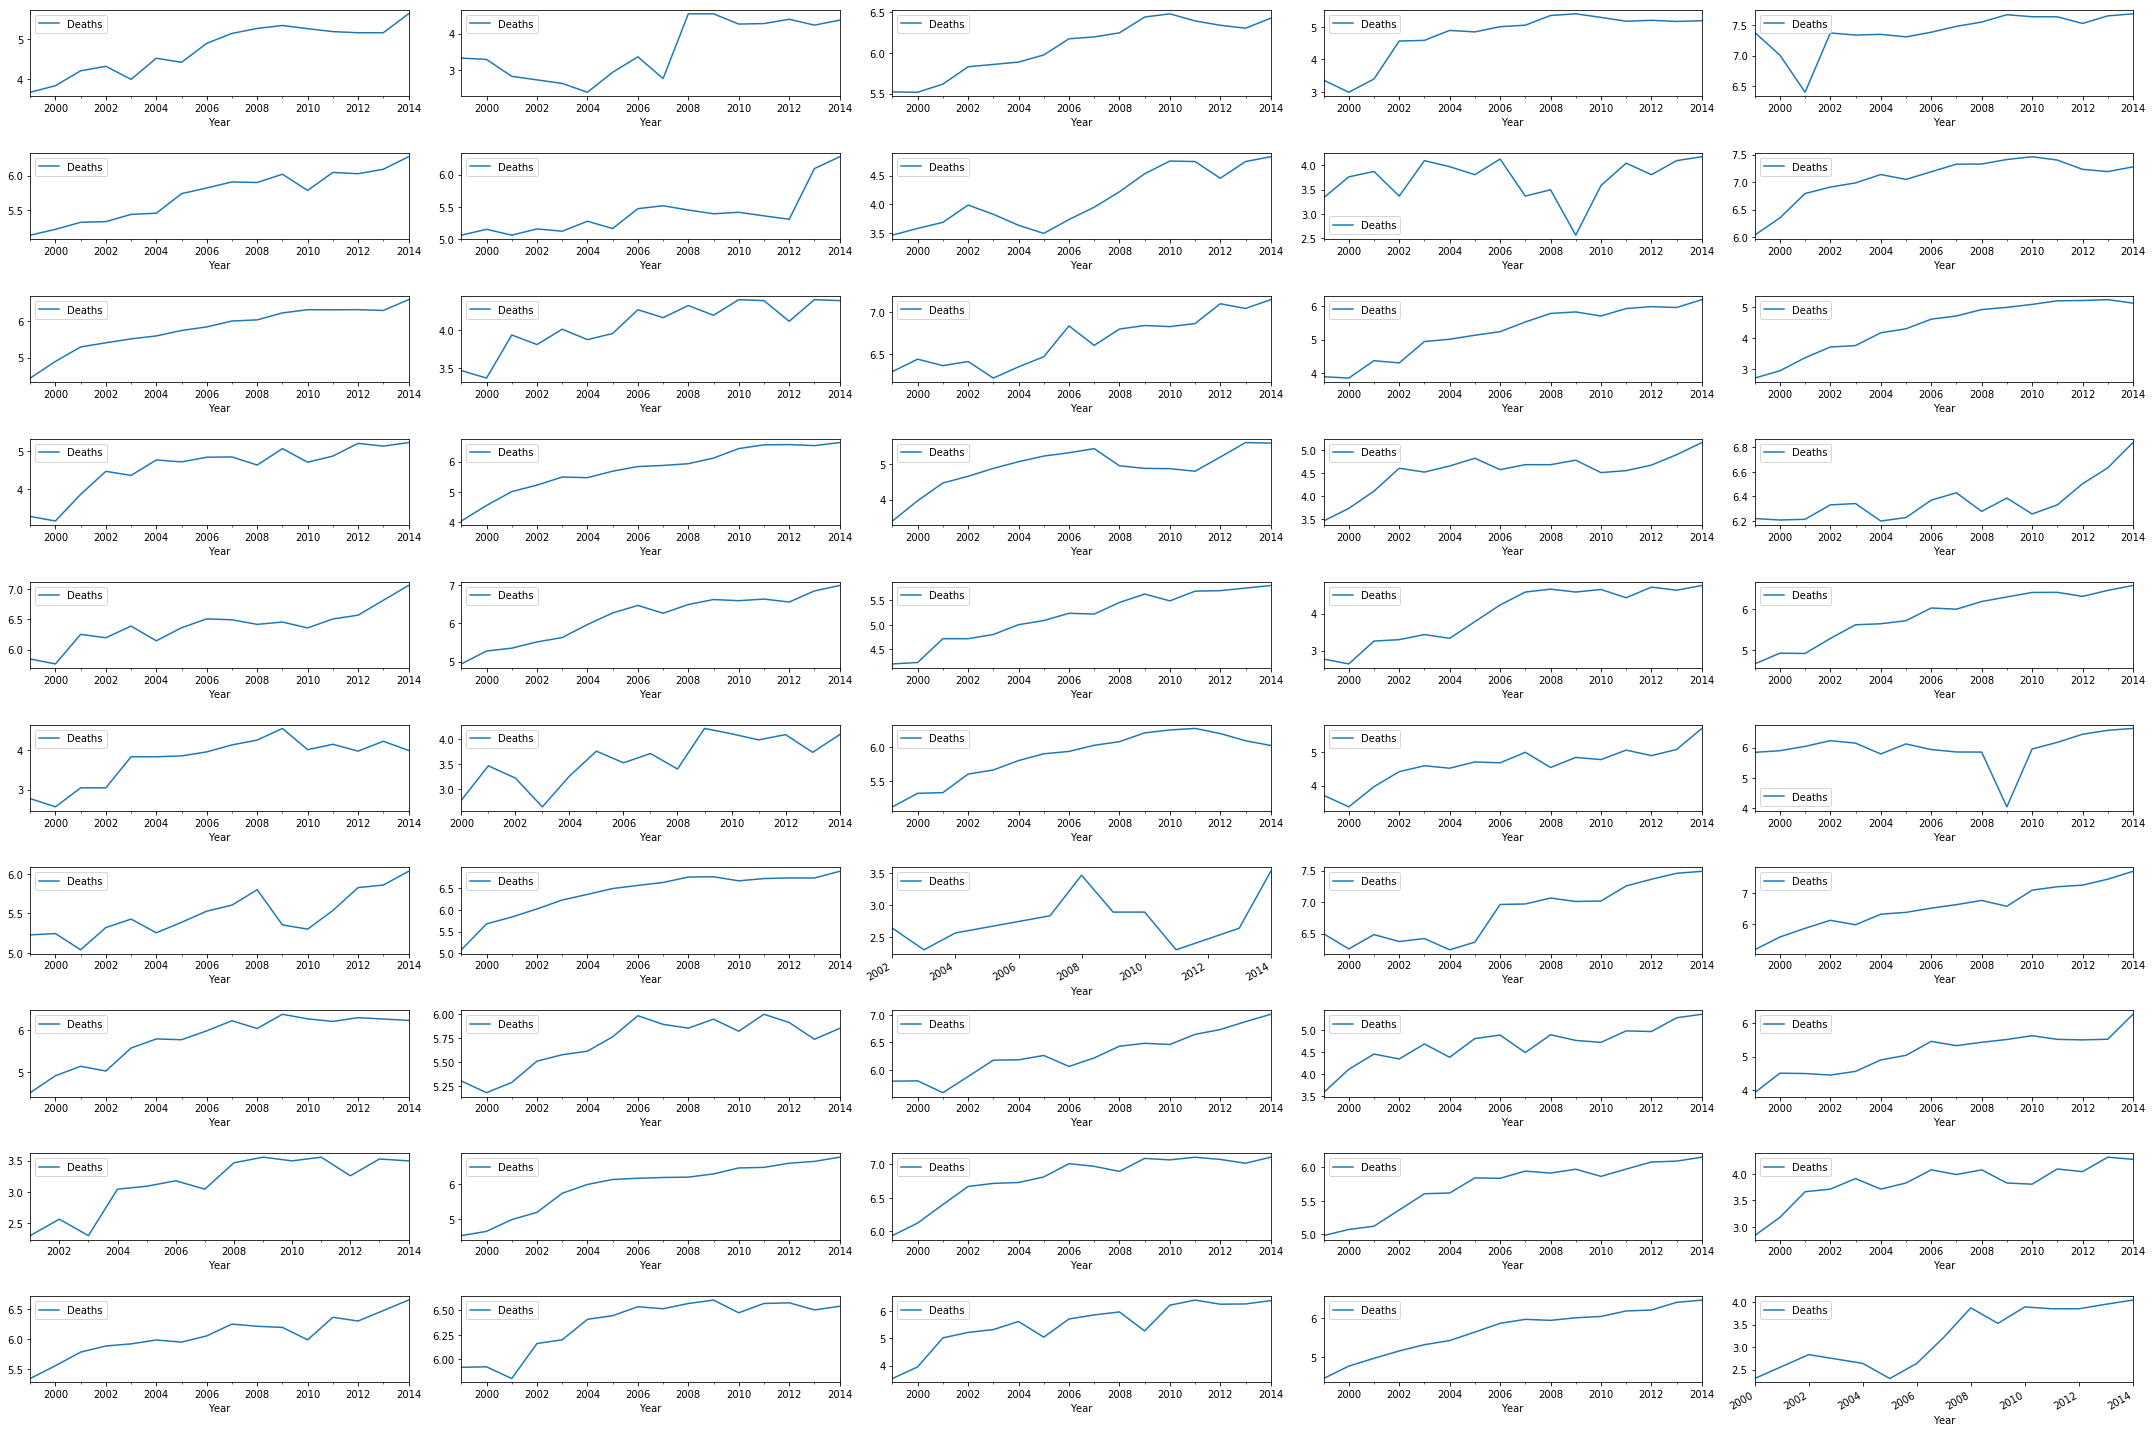

In [122]:
## log transformatiom
# plt.figure(figsize=(30,20), facecolor='white')
# plot_number = 1
# for i in new_list:
#     # Inside of an image that's a 15x13 grid, put this
#     # graph in the in the plot_number slot.
#     ax = plt.subplot(10, 5, plot_number)
#     i.plot(x='Year', y='Deaths', ax=ax)
# #     ax.set_title(i)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1
# plt.tight_layout()

In [122]:
 # log trans
def dickey_fuller_diff(list_of_dfs):
    for i in list_of_dfs:
        X = i['Deaths'].values
        result = adfuller(X)
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [123]:
dickey_fuller(new_list)

ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.953527
p-value: 0.769835
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -1.504940
p-value: 0.531066
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -2.499740
p-value: 0.115538
ADF Statistic: -0.695988
p-value: 0.847786
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.204436
p-value: 0.937991
ADF Statistic: -

ValueError: maxlag should be < nobs

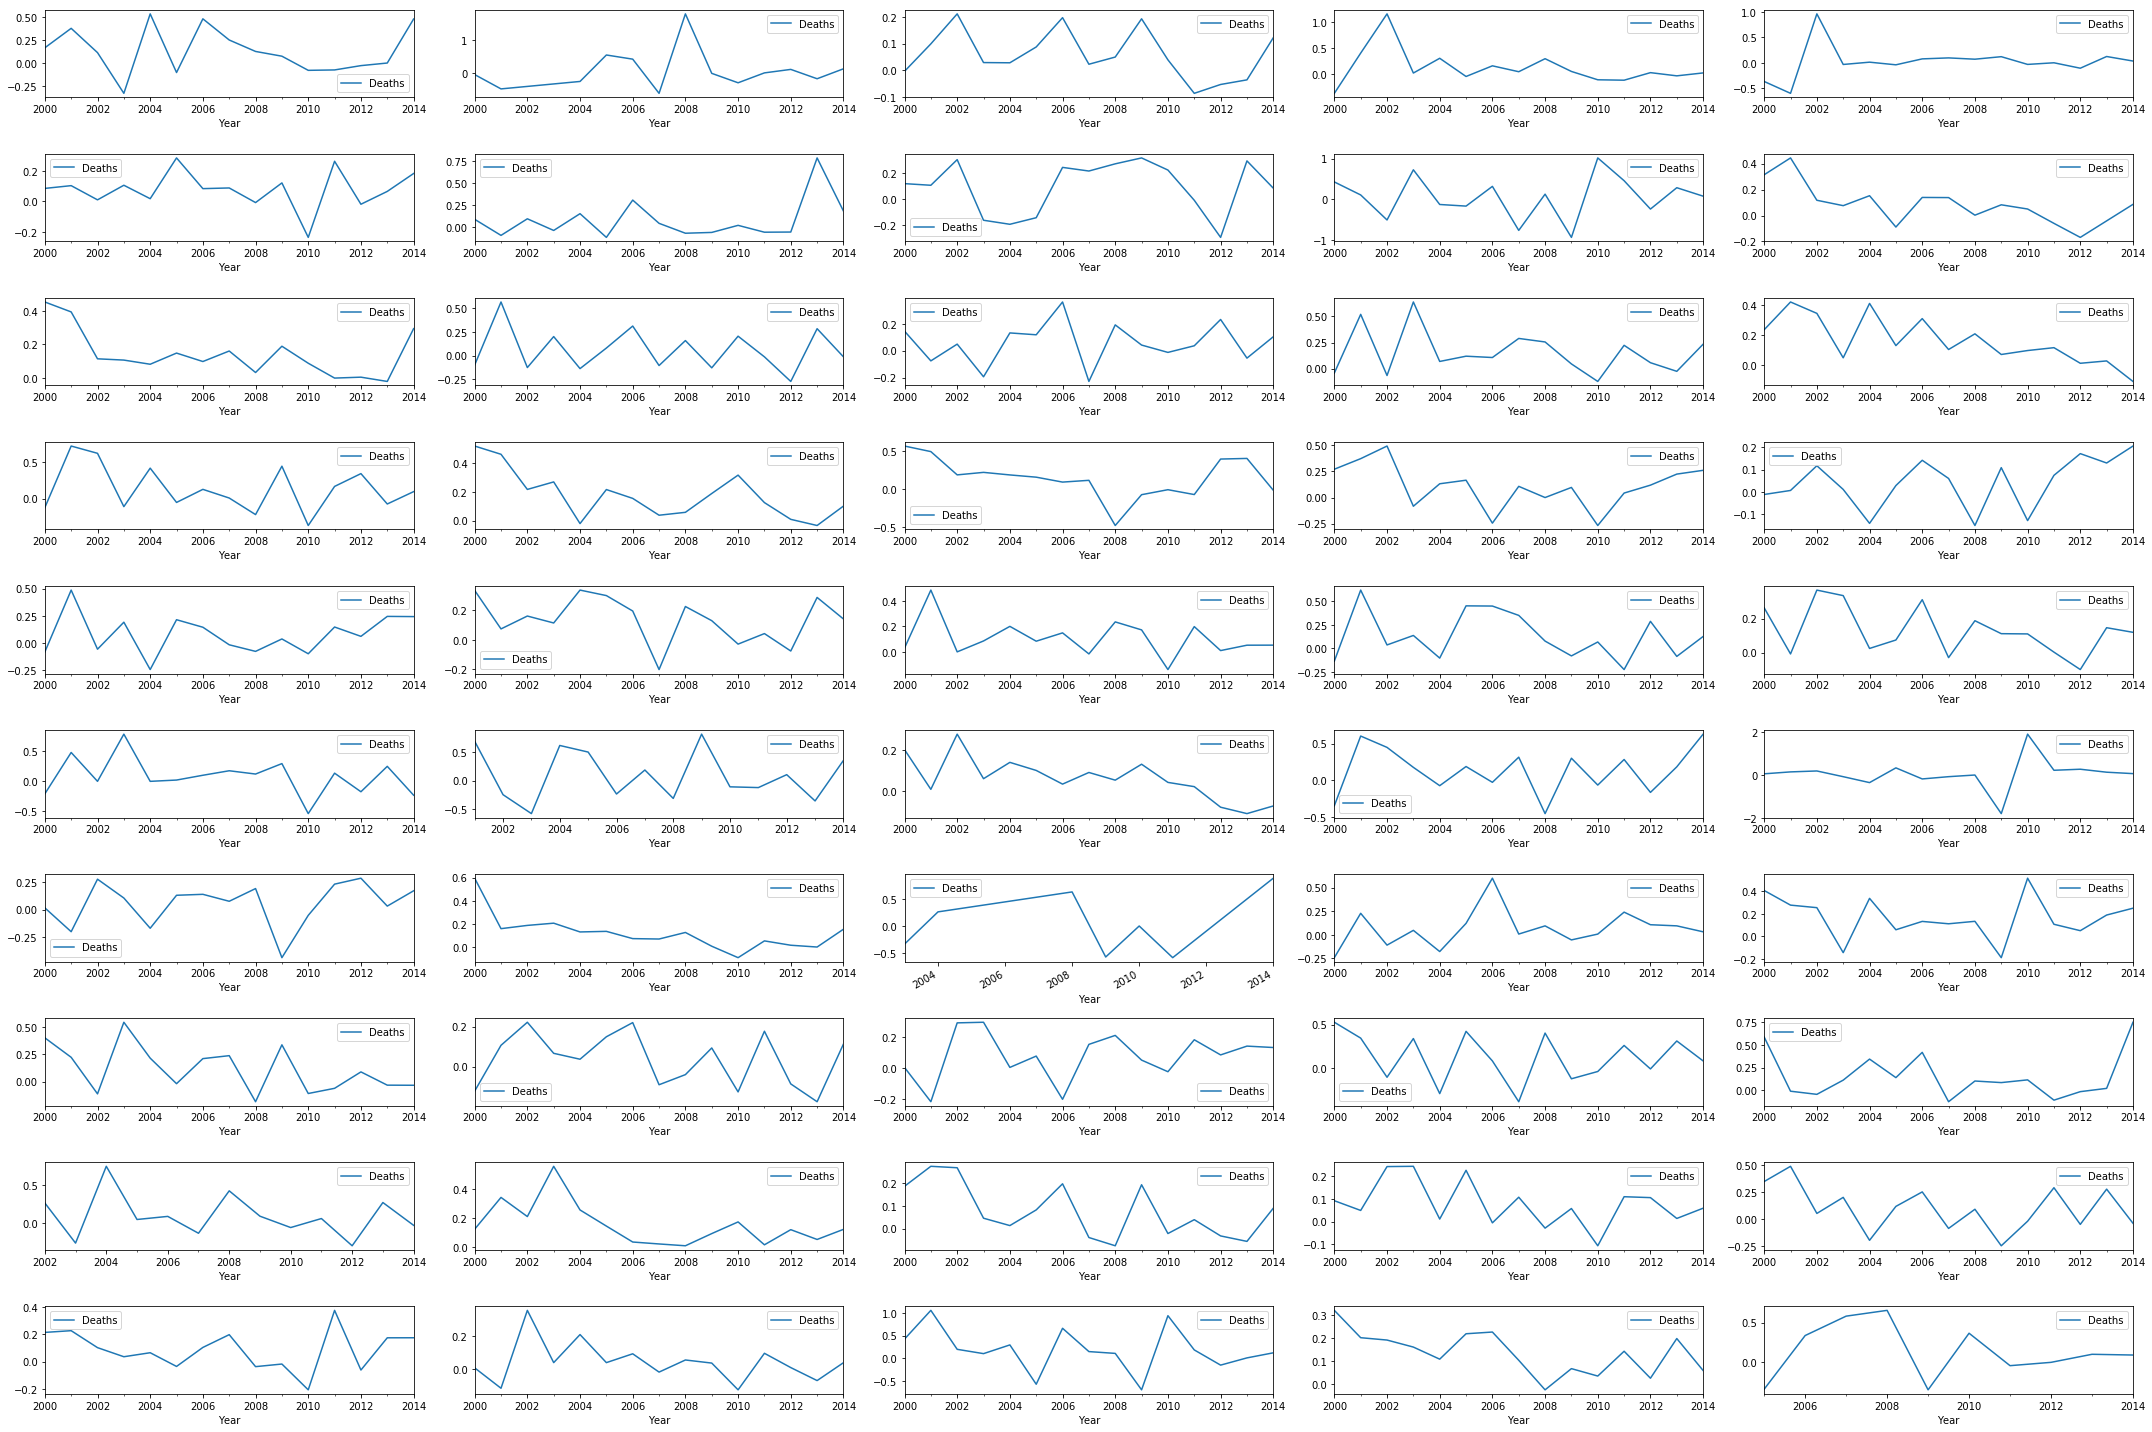

In [147]:
## Stationarity check!
plt.figure(figsize=(30,20), facecolor='white')
plot_number = 1
for i in new_list:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(10, 5, plot_number)
    i.plot(x='Year', y='Deaths', ax=ax)
#     ax.set_title(i)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

In [124]:
# # log trans
# def dickey_fuller_log(list_of_dfs):
#     for i in list_of_dfs:
#         X = i['Deaths'].values
#         result = adfuller(X)
#         print('ADF Statistic: %f' % result[0])
#         print('p-value: %f' % result[1])

In [125]:
# dickey_fuller_log(new_list)

ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -1.104857
p-value: 0.713131
ADF Statistic: -1.505231
p-value: 0.530922
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 3.800637
p-value: 1.000000
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -14.896353
p-value: 0.000000
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: 0.326132
p-value: 0.978512
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: 0.000000
p-value: 0.958532
ADF Statistic: -0.000000
p-value: 0.958532
ADF Statistic: -1.9

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [122]:
# def dickey_fuller_diff(list_of_dfs):
#     for i in list_of_dfs:
#         X = i['Deaths'].values
#         result = adfuller(X)
#         print('ADF Statistic: %f' % result[0])
#         print('p-value: %f' % result[1])
# #         print('Critical Values:')
# #         for key, value in result[4].items():
# #             print('\t%s: %.3f' % (key, value))

In [124]:
# dickey_fuller_diff(new_list)

In [148]:
def autocorrelation (list_):
    """ takes a list of df trasnfomation and return a auntocorrelation plot"""
    for df in list_:
#         print(df)
        plot = plot_acf(df["Deaths"], alpha=.05)   
        return plot

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


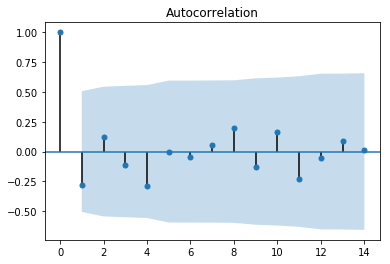

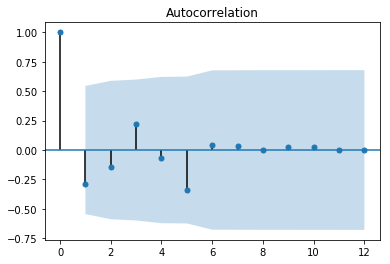

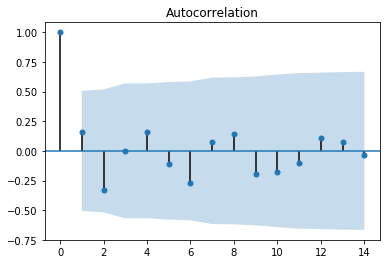

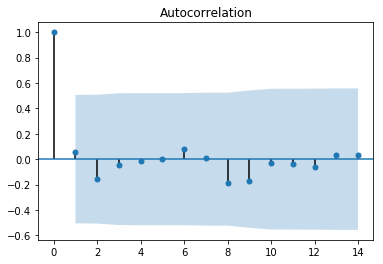

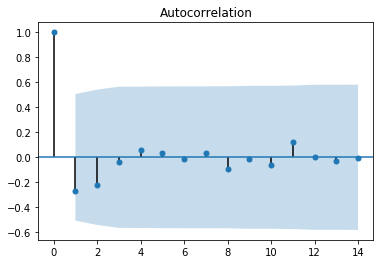

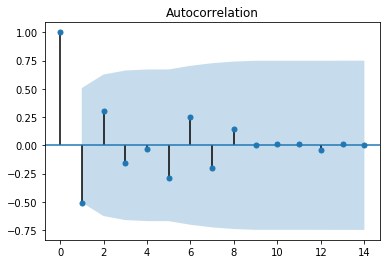

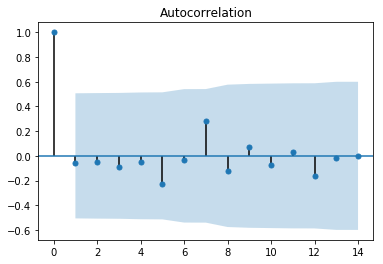

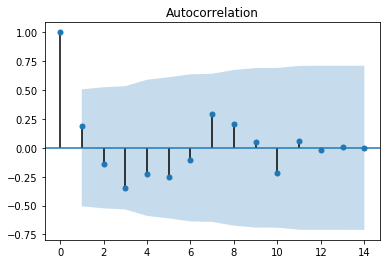

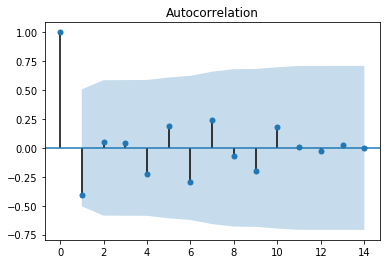

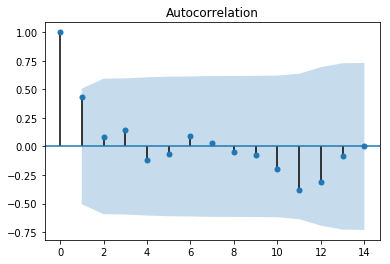

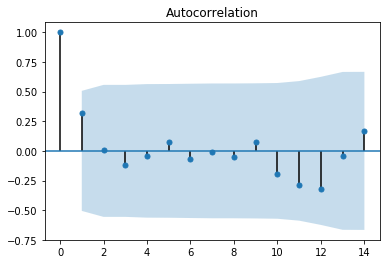

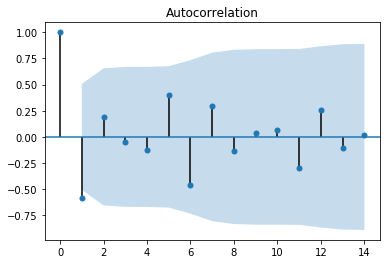

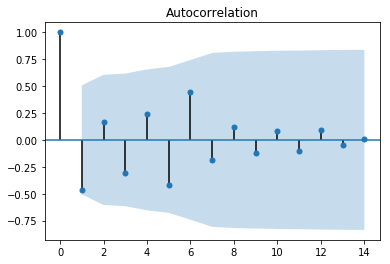

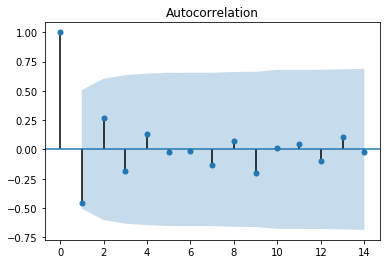

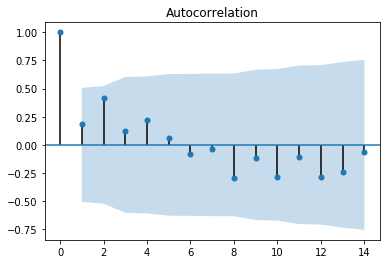

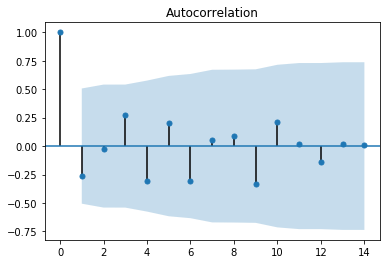

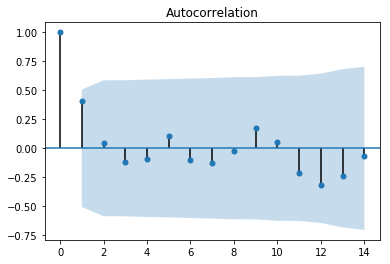

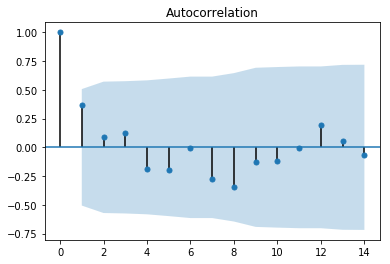

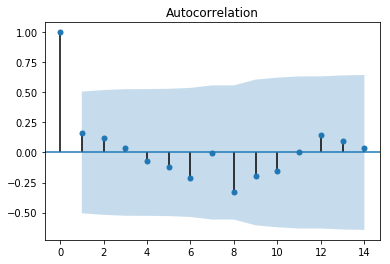

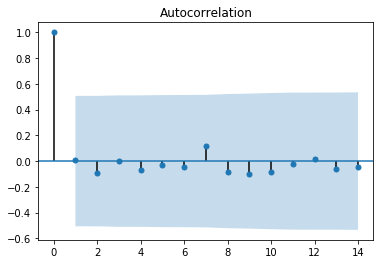

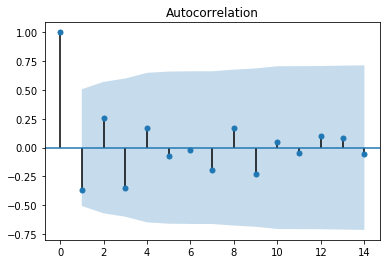

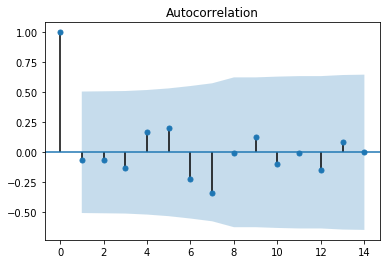

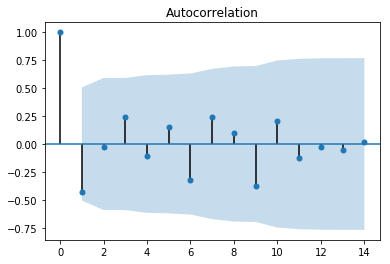

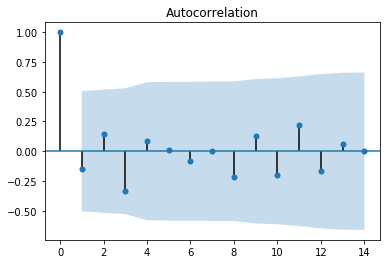

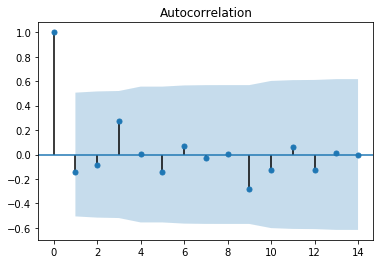

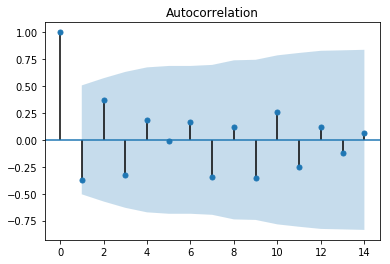

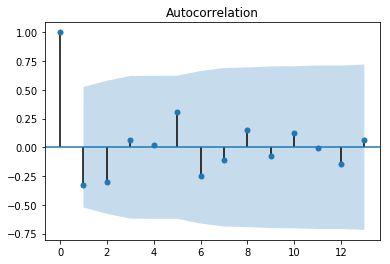

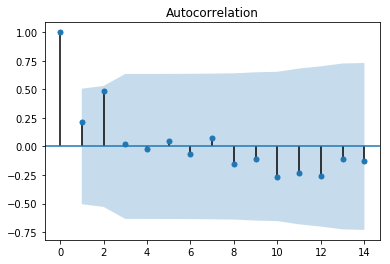

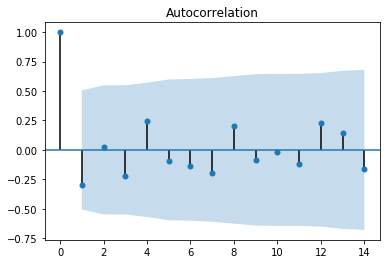

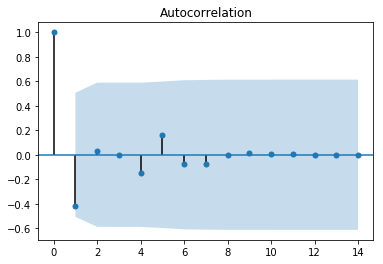

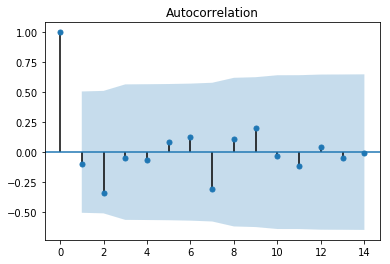

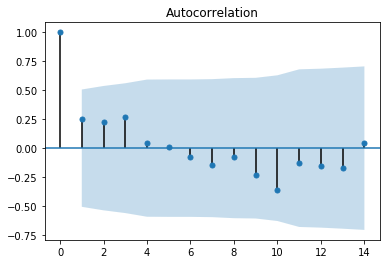

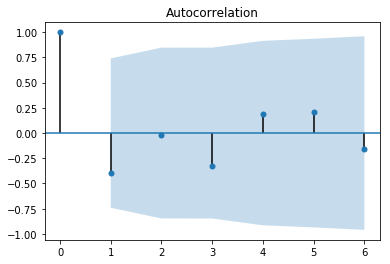

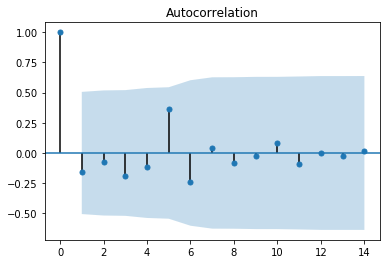

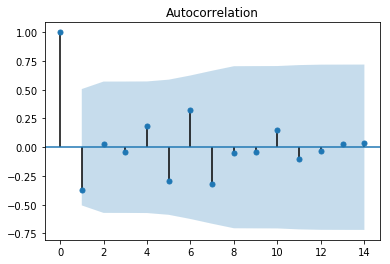

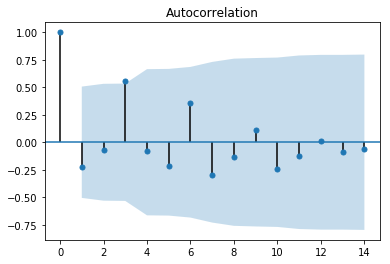

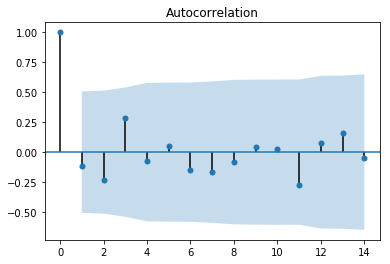

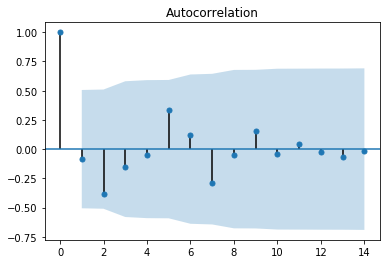

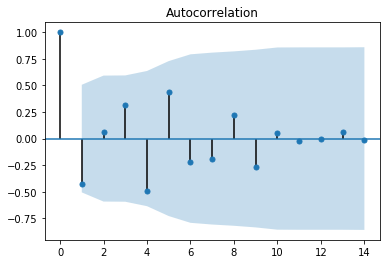

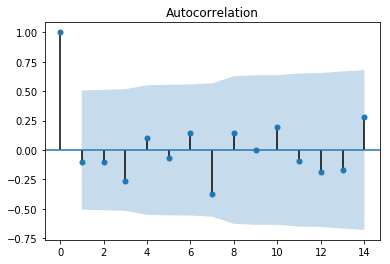

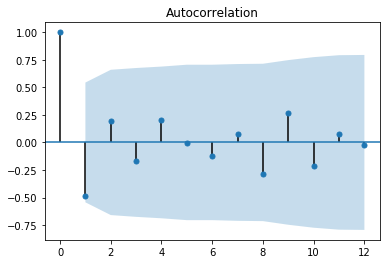

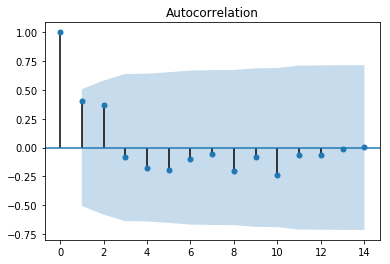

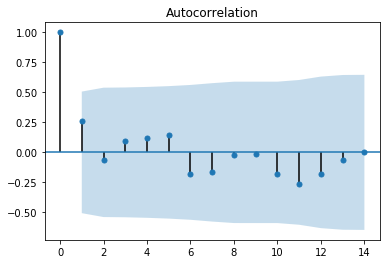

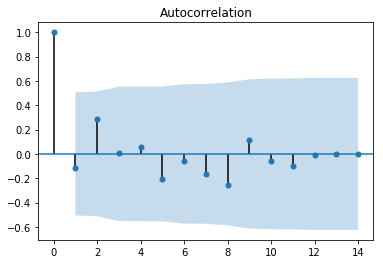

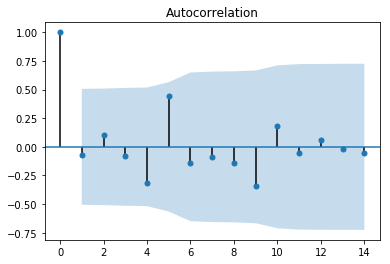

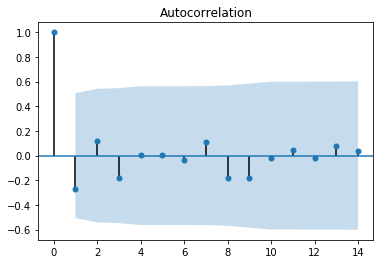

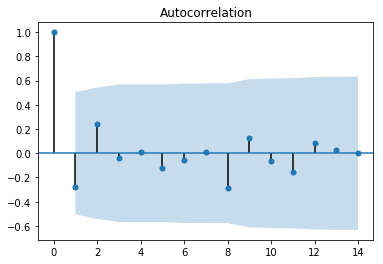

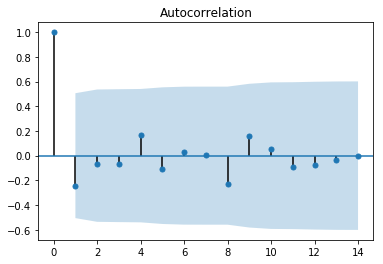

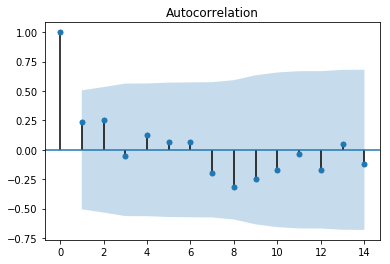

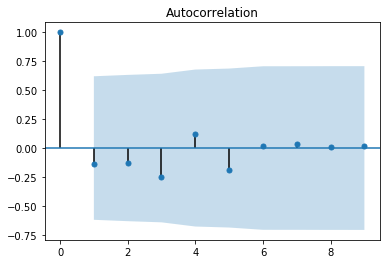

In [150]:
autocorrelation(new_list)

In [178]:
# from statsmodels.graphics.tsaplots import plot_acf
# #plot autocorrelation for each lag (alpha is confidence interval)
# plot_acf(new_list[2]["Deaths"], alpha=.05)

In [158]:
def partial_autocorrealtion (list_):
    for df in list_:
        plot = plot_pacf(df['Deaths'], alpha=.05, lags=20)
    return plot

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


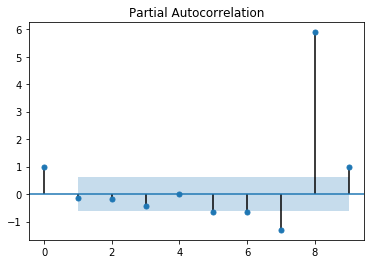

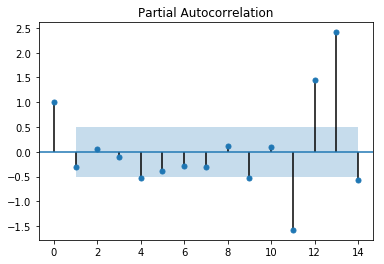

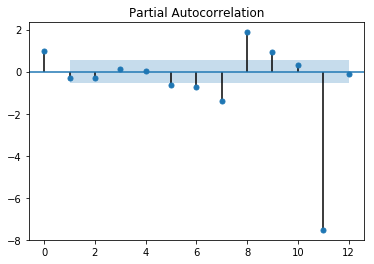

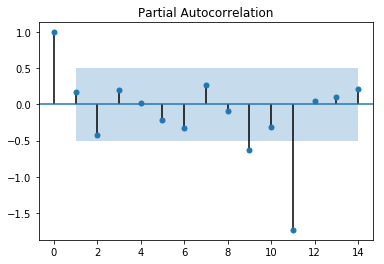

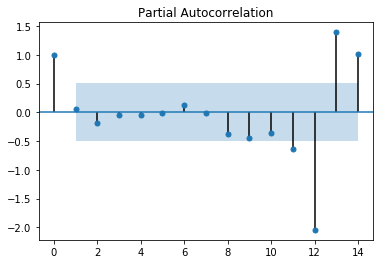

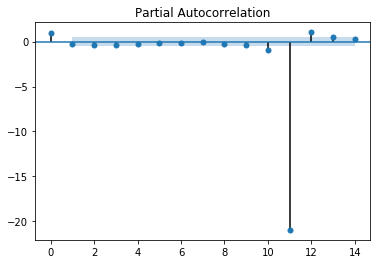

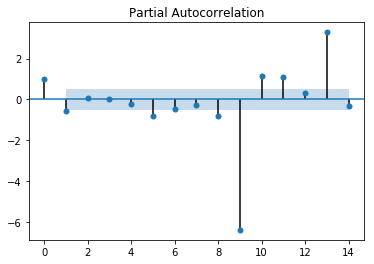

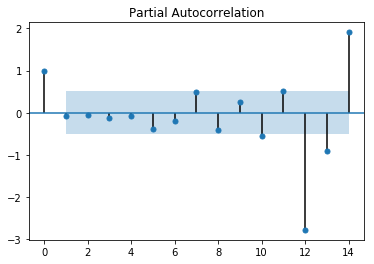

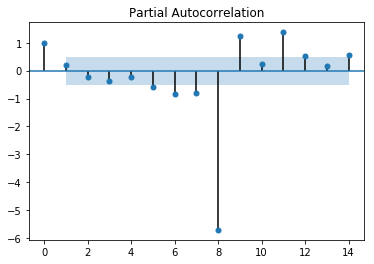

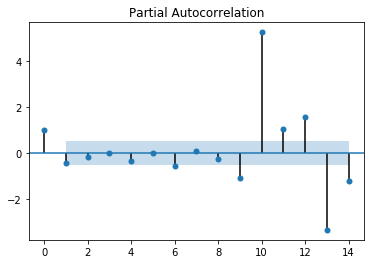

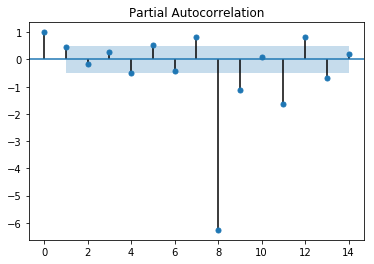

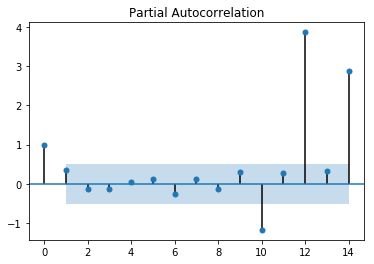

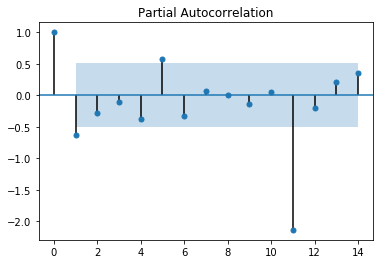

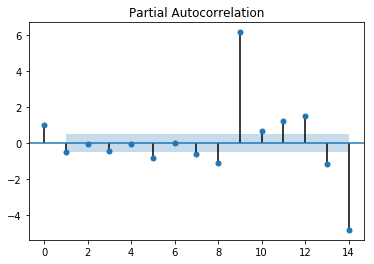

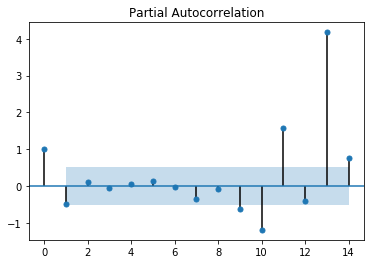

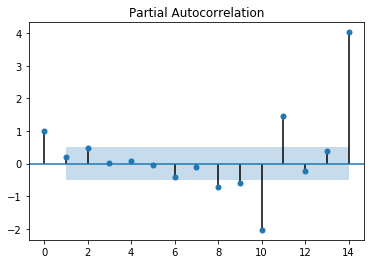

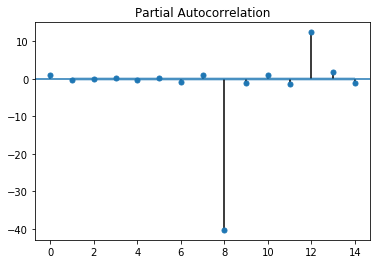

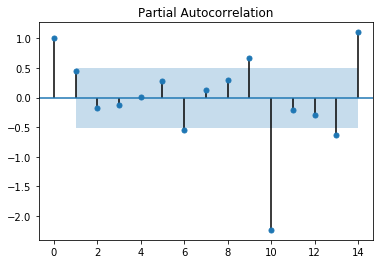

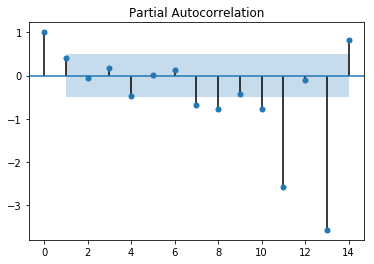

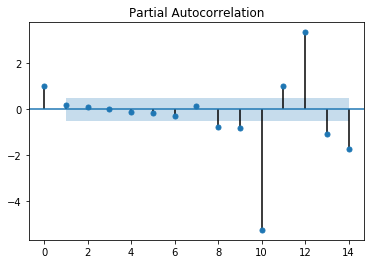

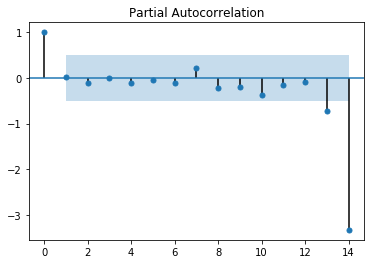

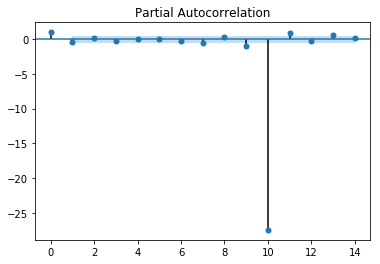

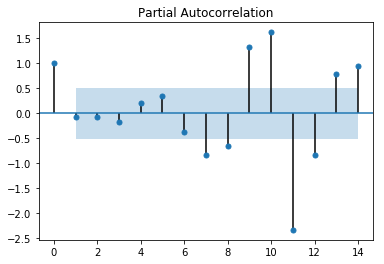

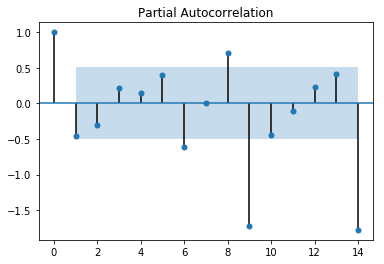

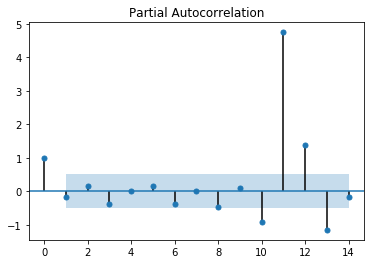

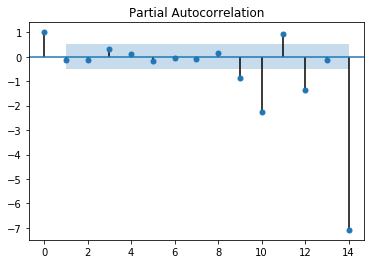

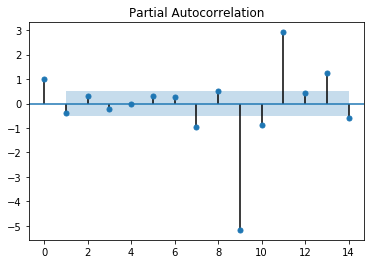

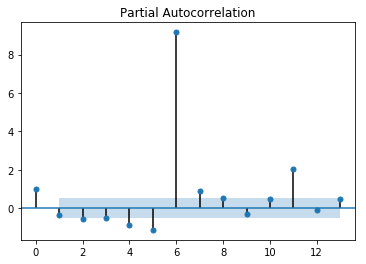

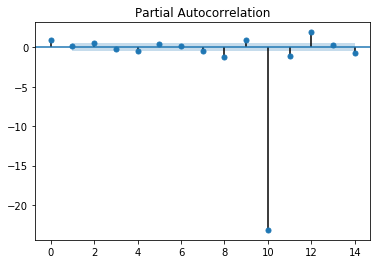

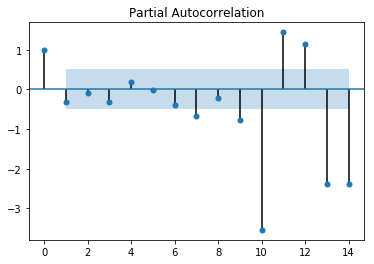

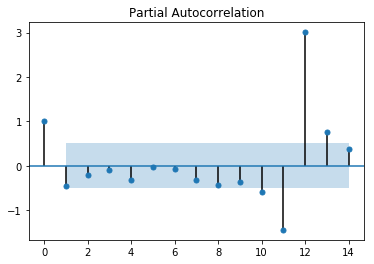

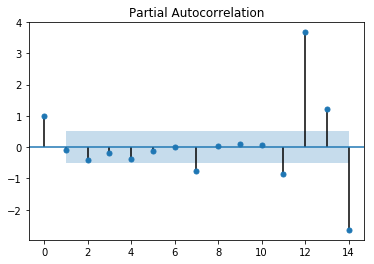

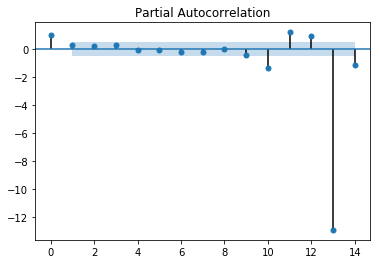

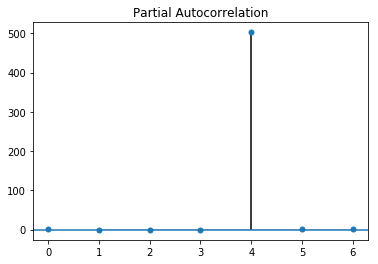

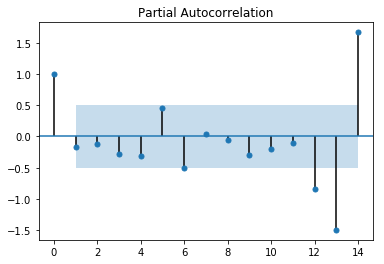

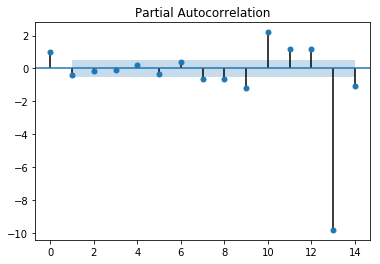

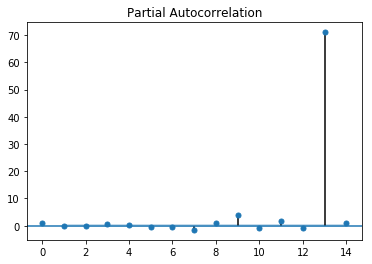

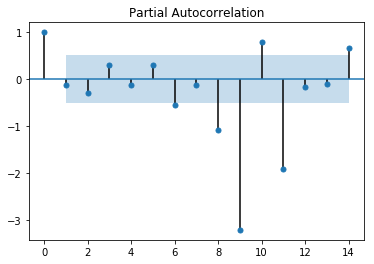

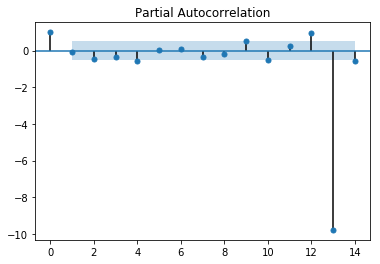

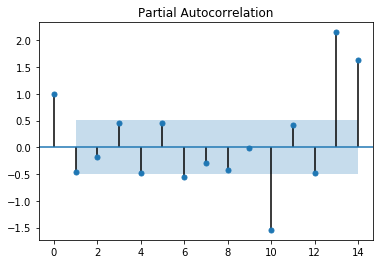

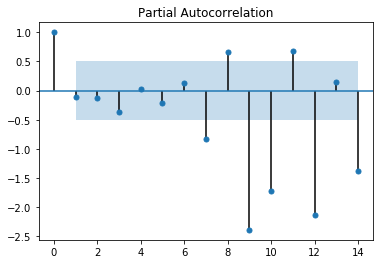

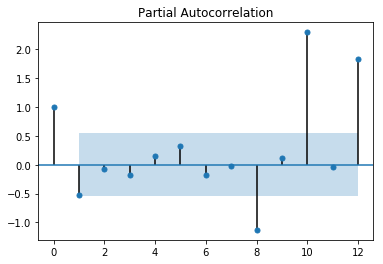

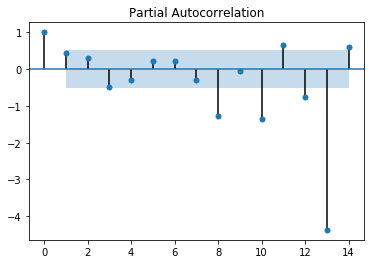

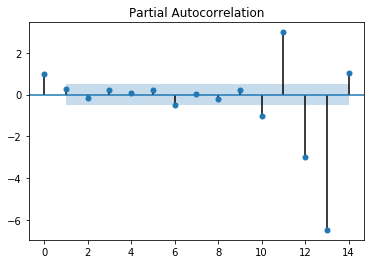

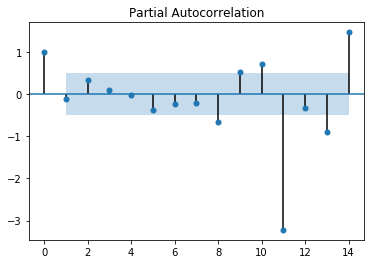

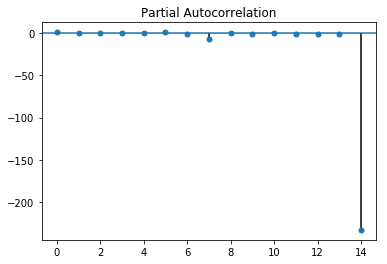

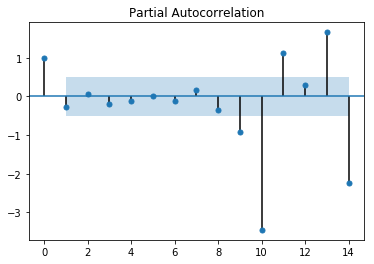

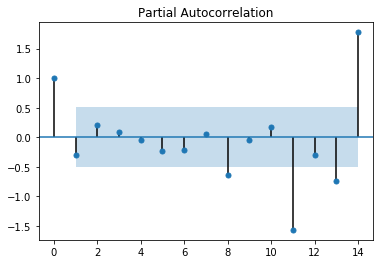

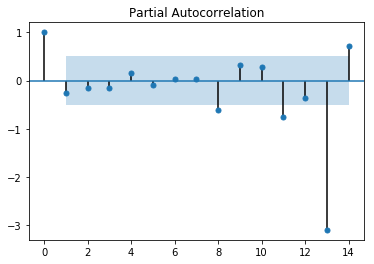

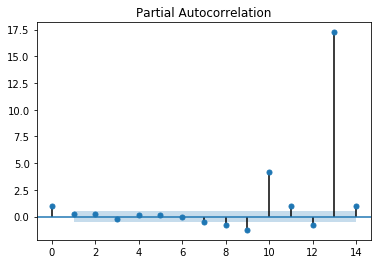

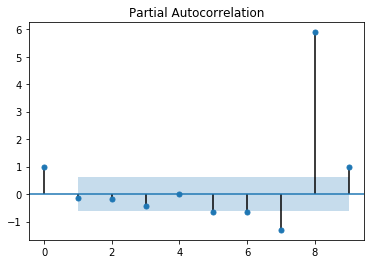

In [159]:
partial_autocorrealtion(new_list)

In [178]:
for i in new_list:
    vals = i['Deaths']
    train = vals[:11]
    test = vals[11:]

        # Use a list comprehension to create a "history" list using our training data values
    history = [i for i in train]

        # initialize an empty list for predictions
    preds = []

        # loop through a list the length of our training set
    for i in range(len(test)):

        # create an ARIMA model and pass in our history list. Also set `order=(0,1,1)` (order refers to AR and MA params--
        # see statsmodels documentation for ARIMA for more details)
        model = ARIMA(history, order=(0,1,1))

                # Fit the model we just created
        fitted_model = model.fit(disp=0)
                # Get the forecast of the next value from our fitted model, and grab the first value to use as our 'y-hat' prediction
        output = fitted_model.forecast()
        y_hat = output[0]

                # append y_hat to our list of predictions
        preds.append(y_hat)
        obs = test[i]

                # Get the actual ground truth value for this datetime and append it to the history array
        history.append(obs)


        # get the forecast for the next three years (1 month==1 timestep in our data)
        future_preds = fitted_model.forecast(steps=36)[0]


KeyError: 0

In [149]:
m = new_list[0]["Deaths"]

In [154]:
m[:11]

1     0.165080
2     0.376051
3     0.112795
4    -0.328504
5     0.532805
6    -0.102948
7     0.478999
8     0.249655
9     0.125505
10    0.074108
11   -0.079249
Name: Deaths, dtype: float64

In [157]:
m[11 :]

12   -0.074901
13   -0.028171
14    0.000000
15    0.477121
Name: Deaths, dtype: float64

In [145]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(list_of_dfs, p_values, d_values, q_values):
    for i in list_of_dfs:
        dataset = i['Deaths']
#         print(dataset)
        best_score, best_cfg = float("inf"), None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    try:
                        mse = evaluate_arima_model(dataset, order)
                        if mse < best_score:
                            best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                    except:
                        continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
# def parser(x):
# 	return datetime.strptime('190'+x, '%Y-%m')
series = new_list
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [181]:
def fit_model(list_of_df, show_graph=True):
    # Get only the values from the dataframe
    for i in list_of_df:
        
        vals = i["Deaths"]
#         print(vals)
        # Split the data into training and testing sets by holding out dates past a certain point. Below, we use index 261 for 
        # this split
        train = vals[:11]
        test = vals[11:]

        # Use a list comprehension to create a "history" list using our training data values
        history = [i for i in train]

        # initialize an empty list for predictions
        preds = []

        # loop through a list the length of our training set
        for i in range(len(test)):

        # create an ARIMA model and pass in our history list. Also set `order=(0,1,1)` (order refers to AR and MA params--
        # see statsmodels documentation for ARIMA for more details)
            model = ARIMA(history, order=(0,1,1))

            # Fit the model we just created
            fitted_model = model.fit(disp=0)
            # Get the forecast of the next value from our fitted model, and grab the first value to use as our 'y-hat' prediction
            output = fitted_model.forecast()
            y_hat = output[0]

            # append y_hat to our list of predictions
            preds.append(y_hat)
            obs = test[i]

            # Get the actual ground truth value for this datetime and append it to the history array
            history.append(obs)
    
    
    # get the forecast for the next three years (1 month==1 timestep in our data)
    future_preds = fitted_model.forecast(steps=36)[0]

    # Visualize the ARIMA model's predictions vs the actual ground truth values for our test set
    if show_graph == True:
        print('Predicted: {} \t Expected: {}'.format(y_hat, obs))
        # Also calculate the MSE
        mse = mean_squared_error(test, preds)
        print("MSE for Test Set: {}".format(mse))
        plt.plot(test)
        plt.plot(preds, color='r')
        plt.ylabel('Median Home Value ($)')
#         plt.title('Predicted vs Expected Median Home Sale Values'.format(zipcode))
        plt.legend(['Actual', 'Predicted'])
        plt.show()

        
        plt.figure()
        plt.plot(future_preds)
        plt.ylabel('Median Home Value ($)')
#         plt.title('Predicted Home Value, {}, Next 36 Months'.format(zipcode))
        plt.show()
        get_results(df, future_preds)
        
    return future_preds

In [182]:
fit_model(new_list)

KeyError: 0

In [133]:
from statsmodels.tsa.arima_model import ARIMA
# fit ARIMA model (3,1,0))
def Arima_model (list_df):
    for i in list_df:
        model = ARIMA(i['Deaths'], order=(0,0,1))
        model_fit = model.fit(disp=0)
        print(model_fit.summary())
        yhat = model_fit.forecast()[0]
        warnings.filterwarnings("ignore")

        print(yhat)

In [134]:
Arima_model(new_list)

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   0.626
Method:                       css-mle   S.D. of innovations              0.231
Date:                Thu, 05 Sep 2019   AIC                              4.747
Time:                        13:31:59   BIC                              6.871
Sample:                             0   HQIC                             4.724
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1237      0.043      2.852      0.014       0.039       0.209
ma.L1.Deaths    -0.3061      0.292     -1.050      0.313      -0.878       0.265
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   1.487
Method:                       css-mle   S.D. of innovations              0.219
Date:                Thu, 05 Sep 2019   AIC                              3.025
Time:                        13:31:59   BIC                              5.149
Sample:                             0   HQIC                             3.003
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0802      0.053      1.507      0.156      -0.024       0.184
ma.L1.Deaths    -0.0661      0.279     -0.237      0.816      -0.612       0.480
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   7.197
Method:                       css-mle   S.D. of innovations              0.150
Date:                Thu, 05 Sep 2019   AIC                             -8.393
Time:                        13:31:59   BIC                             -6.269
Sample:                             0   HQIC                            -8.416
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1603      0.043      3.753      0.002       0.077       0.244
ma.L1.Deaths     0.1098      0.197      0.558      0.586      -0.276       0.495
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   8.703
Method:                       css-mle   S.D. of innovations              0.135
Date:                Thu, 05 Sep 2019   AIC                            -11.406
Time:                        13:31:59   BIC                             -9.281
Sample:                             0   HQIC                           -11.428
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1271      0.030      4.222      0.001       0.068       0.186
ma.L1.Deaths    -0.1497      0.245     -0.610      0.553      -0.631       0.331
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   9.133
Method:                       css-mle   S.D. of innovations              0.120
Date:                Thu, 05 Sep 2019   AIC                            -12.267
Time:                        13:32:00   BIC                            -10.143
Sample:                             0   HQIC                           -12.289
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1478      0.060      2.463      0.029       0.030       0.265
ma.L1.Deaths     0.9999      0.248      4.040      0.001       0.515       1.485
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                   0.608
Method:                       css-mle   S.D. of innovations              0.212
Date:                Thu, 05 Sep 2019   AIC                              4.784
Time:                        13:32:00   BIC                              6.908
Sample:                             0   HQIC                             4.761
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0808      0.011      7.033      0.000       0.058       0.103
ma.L1.Deaths    -0.9999      0.262     -3.821      0.002      -1.513      -0.487
                                    Roots   

                              ARMA Model Results                              
Dep. Variable:                 Deaths   No. Observations:                   15
Model:                     ARMA(0, 1)   Log Likelihood                  -8.891
Method:                       css-mle   S.D. of innovations              0.435
Date:                Thu, 05 Sep 2019   AIC                             23.781
Time:                        13:32:00   BIC                             25.905
Sample:                             0   HQIC                            23.759
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1784      0.073      2.446      0.029       0.035       0.321
ma.L1.Deaths    -0.3963      0.371     -1.069      0.305      -1.123       0.331
                                    Roots   

NameError: name 'pyplot' is not defined

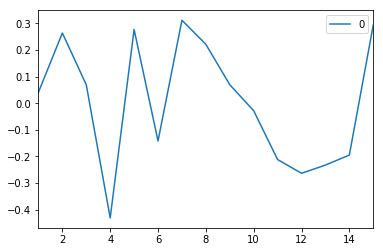

In [135]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

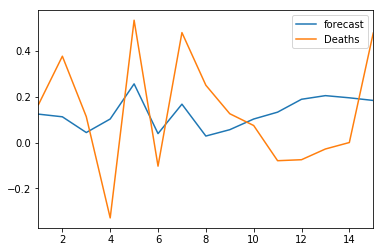

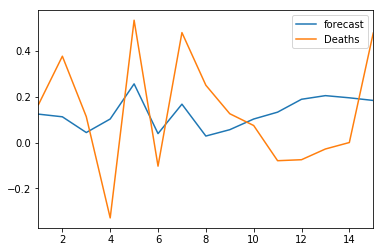

In [136]:
model_fit.plot_predict()# the prediction vs the actual value


In [169]:
model_fit.forecast(36)[0]

array([0.03376896, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216, 0.12369216, 0.12369216, 0.12369216, 0.12369216,
       0.12369216])